# 自作データセットの学習
自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [122]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
%matplotlib inline

In [0]:
n_categories=2
batch_size=1
train_dir = 'gdrive/My Drive/diveintocode-ml/splint19/train'
validation_dir = 'gdrive/My Drive/diveintocode-ml/splint19/val'
file_name='vgg16_movie_fine'
label = ['duck', 'rabi']


In [0]:
base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

In [0]:
#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

In [0]:
#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

In [0]:
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 8 images belonging to 2 classes.


In [0]:
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 4 images belonging to 2 classes.


In [0]:
hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=100,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv')])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 5s 504ms/step - loss: 0.7482 - acc: 0.5000 - val_loss: 0.7536 - val_acc: 0.5000
Epoch 2/100
10/10 [==============================] - 1s 68ms/step - loss: 0.7006 - acc: 0.5000 - val_loss: 0.7449 - val_acc: 0.5000
Epoch 3/100
10/10 [==============================] - 1s 68ms/step - loss: 0.7361 - acc: 0.4000 - val_loss: 0.7172 - val_acc: 0.6000
Epoch 4/100
10/10 [==============================] - 1s 80ms/step - loss: 0.6769 - acc: 0.6000 - val_loss: 0.7070 - val_acc: 0.6000
Epoch 5/100
10/10 [==============================] - 1s 87ms/step - loss: 0.6532 - acc: 0.6000 - val_loss: 0.7291 - val_acc: 0.5000
Epoch 6/100
10/10 [==============================] - 1s 82ms/step - loss: 0.6724 - acc: 0.5000 - val_loss: 0.7124 - val_acc: 0.5000
Epoch 7/100
10/10 [==============================] - 1s 77ms/step - loss: 0.6492 - acc: 0.7000 - val_loss: 0.7184 - val_acc: 0.5000
Epoch 8/100
10/10 [========

In [0]:
#save weights
model.save(file_name+'.h5')

In [0]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

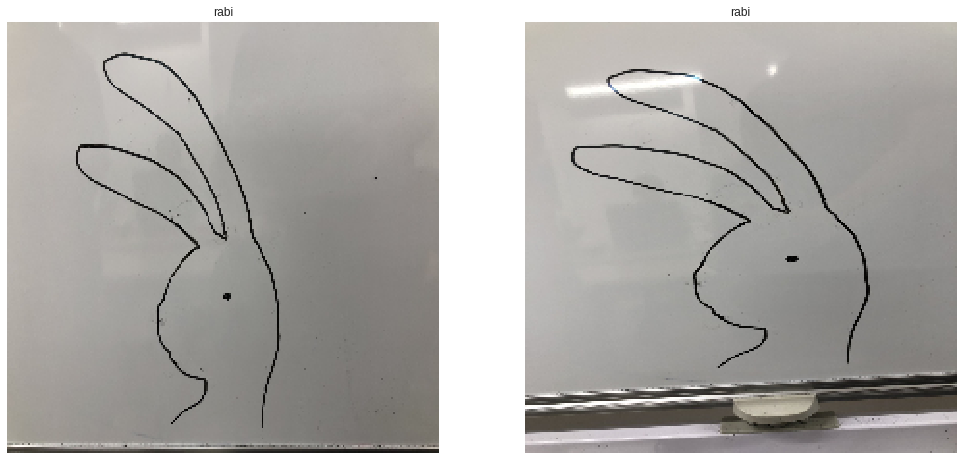

In [0]:
display_dir = 'gdrive/My Drive/diveintocode-ml/splint19/val/rabi'
#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,2)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(2):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(1,2,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

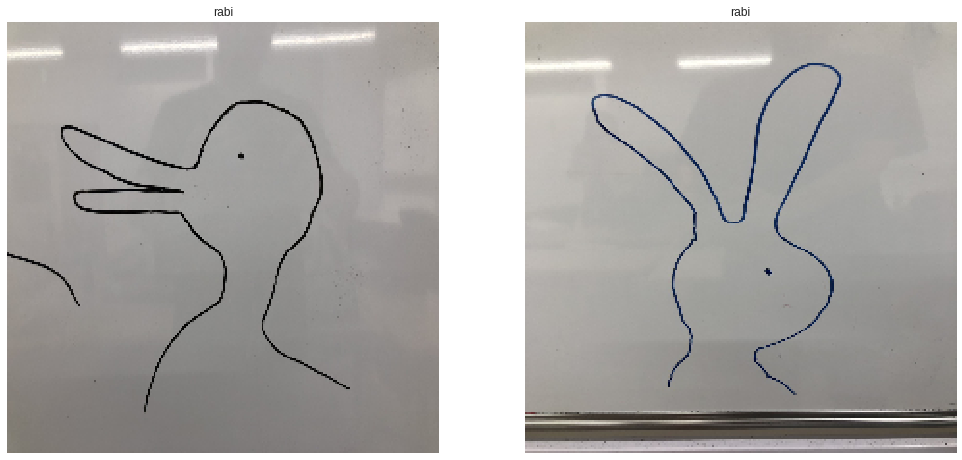

In [0]:
display_dir = 'gdrive/My Drive/diveintocode-ml/splint19/val/duck'
#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,2)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(2):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(1,2,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

データ拡張のためのライブラリ

データ拡張にはalbumentationsなどがあります。

https://github.com/albu/albumentations

データ拡張の効果の調査

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。



In [0]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"
  
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

All libraries are successfully installed!


In [0]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck02.jpg


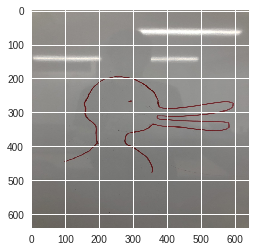

gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck03.jpg


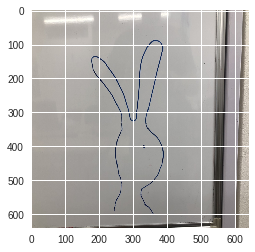

gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck01.jpg


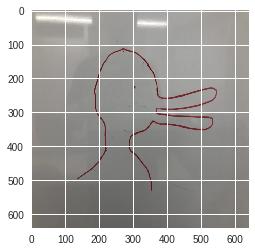

gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck00.jpg


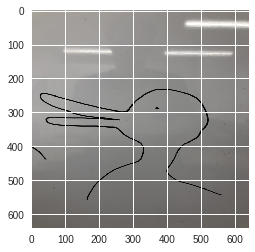

In [0]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob

display_dir = 'gdrive/My Drive/diveintocode-ml/splint19/train/duck'

jpg_files = glob.glob(os.path.join(display_dir,'*.jpg'))
for img_file_name in jpg_files:
    #img->sample1\AXISI.jpg
    print(img_file_name)
    img_file = cv2.imread(img_file_name)
    resize_img = cv2.resize(img_file,(640,640))
    resize_img = cv2.cvtColor(resize_img,cv2.COLOR_BGR2RGB)
    plt.imshow(resize_img)
    plt.show()


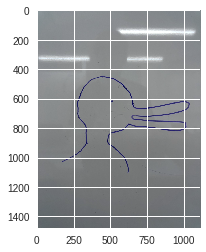

['S__12484771.jpg',
 'S__12484769.jpg',
 'S__12484767.jpg',
 'S__12484770.jpg',
 'S__12484768.jpg']

In [0]:
image = cv2.imread(jpg_files[0])
plt.imshow(img_file_duck00)
plt.show()
img

In [0]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[41, 478, 993, 984]], 'category_id': [17]}
category_id_to_name = {17: 'duck'}

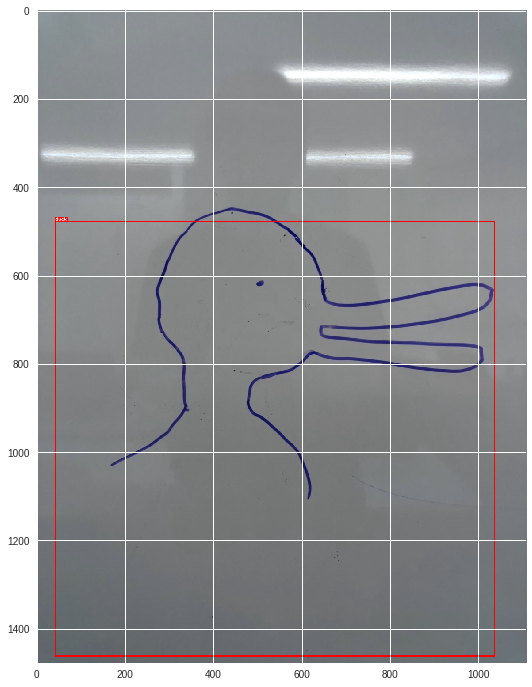

In [0]:
visualize(annotations, category_id_to_name)

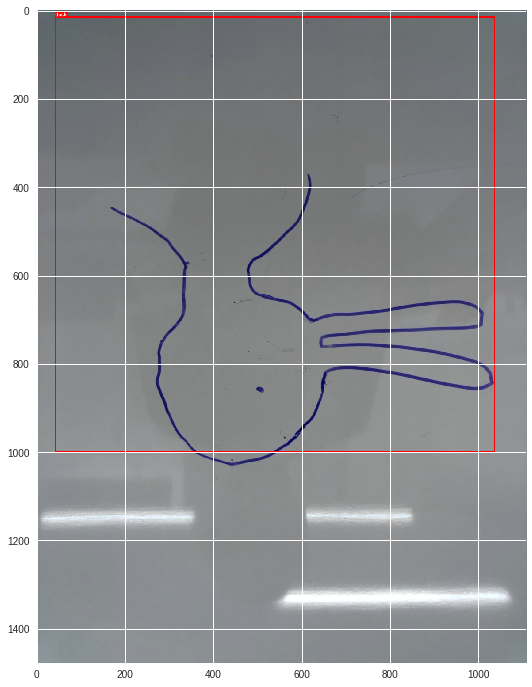

In [0]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

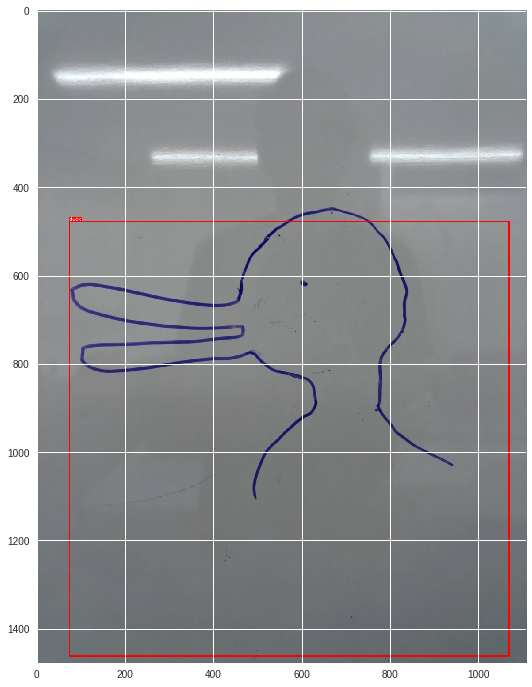

In [0]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

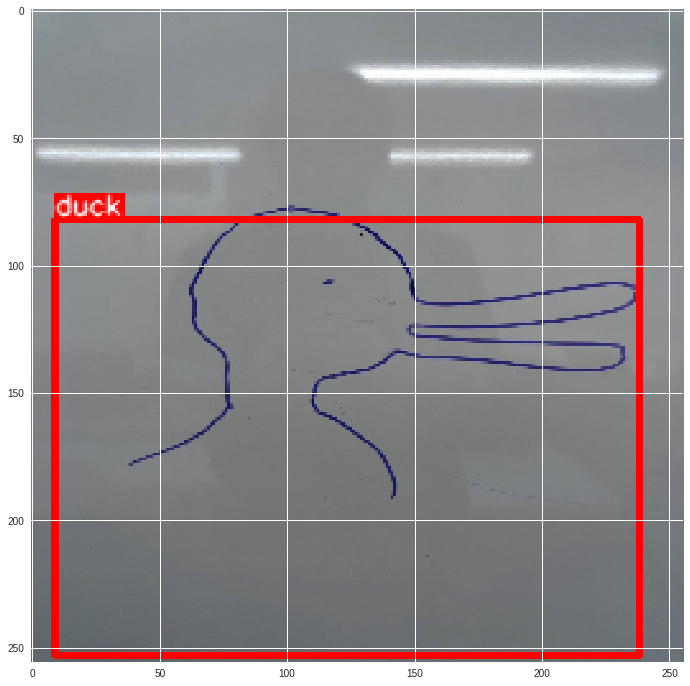

In [0]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

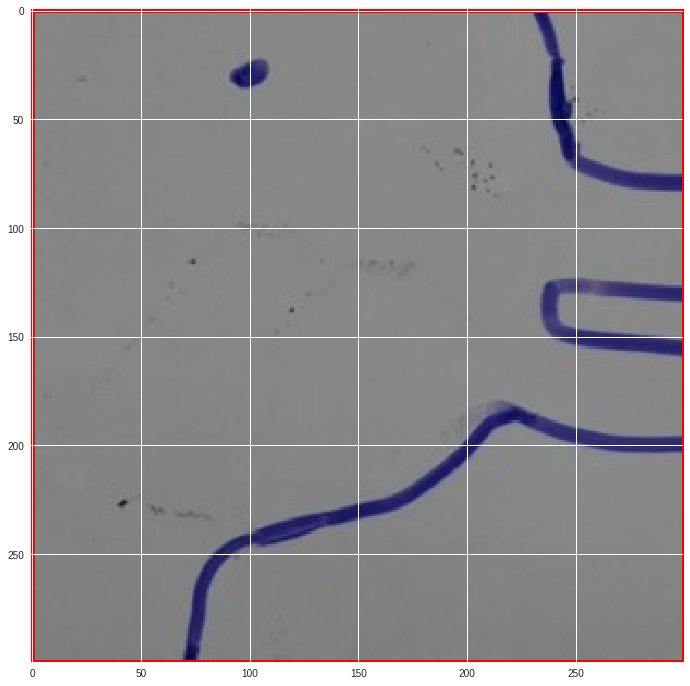

In [0]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

[17]


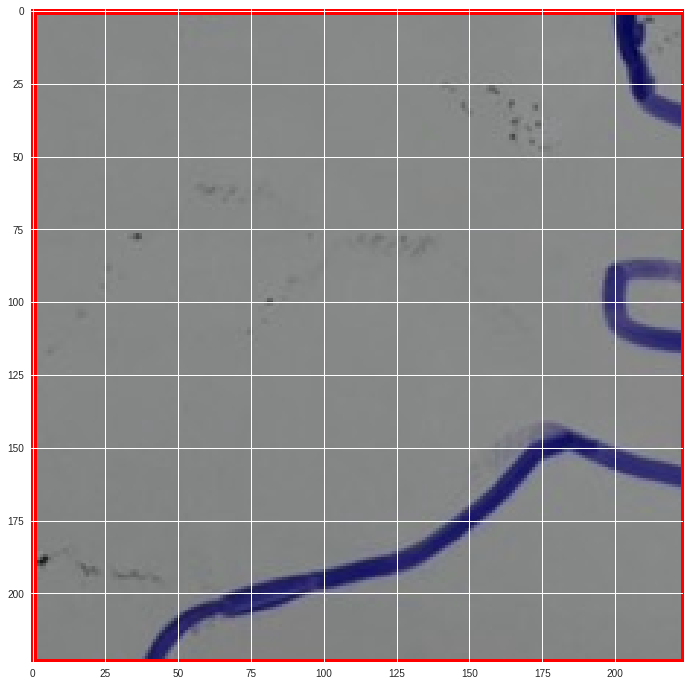

In [0]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

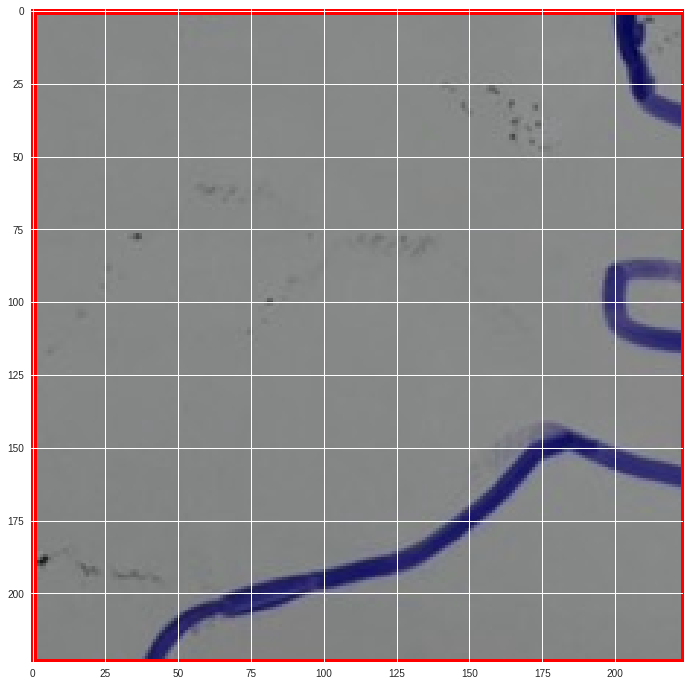

In [0]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

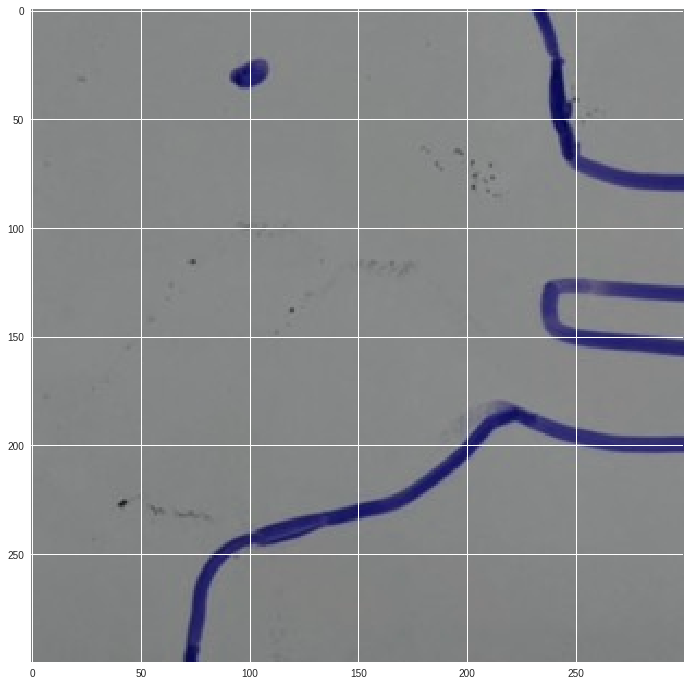

In [0]:

# Compose filters bounding boxes and returns
# only those boxes whose visibility after transformation is above the threshold.
aug = get_aug([CenterCrop(p=1, height=300, width=300)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# Visibility of the transformed bbox for `dog` is about 0.25 (that means that
# the area of the transformed bbox is about 25% of the area of the original bbox),
# so it will be removed
# Visibility of the transformed bbox for `cat` is about 0.36,
# so it will be kept.

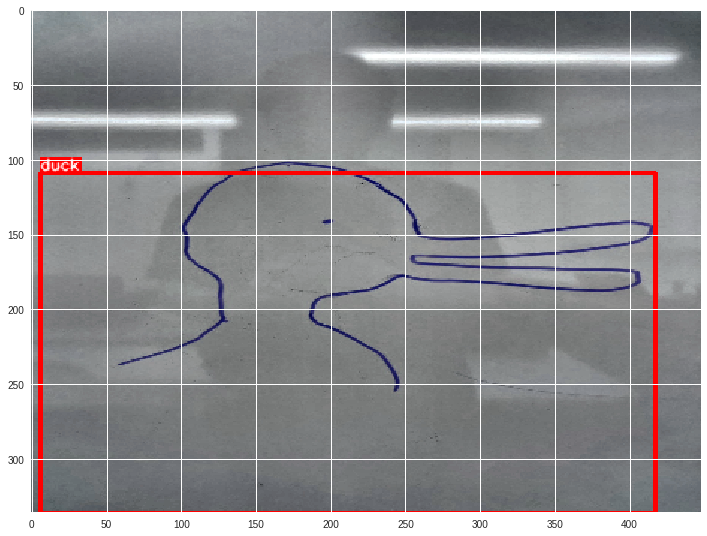

In [0]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

import albumentations as A

aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

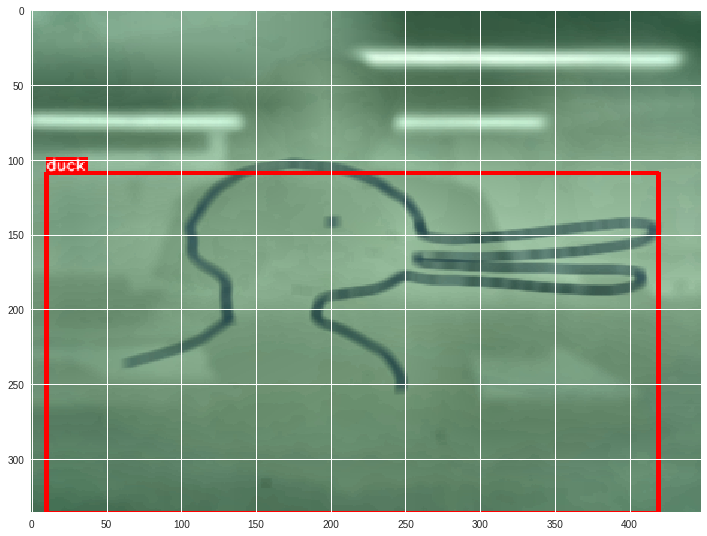

In [0]:
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

アノテーションのためのツール

アノテーションツールにはLabelImgなどがあります。

tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images



In [0]:
# Python 3 + Qt5

# !sudo apt-get install pyqt5-dev-tools
# !sudo pip3 install -r requirements/requirements-linux-python3.txt
# !cd labelImg
# !make qt5py3
# !python3 labelImg.py

## 【問題4】自作データセットでの物体検出の学習
任意の実装を使用して、自作データセットに対して物体検出を行ってください。

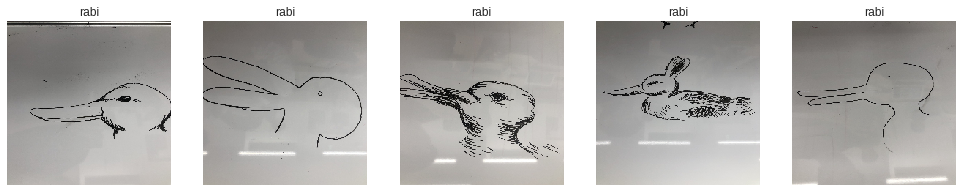

In [0]:

display_dir = 'gdrive/My Drive/diveintocode-ml/splint19/test/duck_or_rabi'
#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,5)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(5):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(1,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

## 【問題6】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

In [0]:
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator

img_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck00.jpg'
# 画像ファイルをPIL形式でオープン
img = image.load_img(img_path)
# PIL形式をnumpyのndarray形式に変換
x = image.img_to_array(img)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

In [0]:
datagen = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [0]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


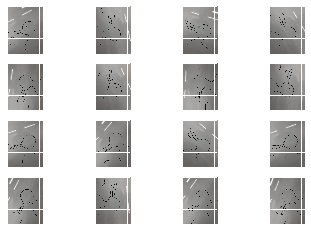

In [127]:
max_img_num = 16
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
# save_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/duck/'  # 保存ディレクトリのパス

# # 指定したディレクトリが存在しないとエラーになるので、
# # 予め作成しておく。
# import os
# os.makedirs(save_path, exist_ok=True)

# # -20° ~ 20° の範囲でランダムに回転する。
# datagen = image.ImageDataGenerator(rotation_range=20)

# # -5° ~ 5° の範囲でランダムにせん断する。 
# datagen = image.ImageDataGenerator(shear_range=5)

# # ミニバッチを生成するジェネレーターを作成する。
# # x = image[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
# gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
#                    save_prefix='generated', save_format='jpg')

# # ジェネレーターで9枚生成する。
# plt.figure(figsize=(10, 8))
# for i in range(9):
#     # ミニバッチを生成したタイミングでディレクトリに
#     # 画像が保存される。
#     next(gen)

In [136]:
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


save_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/duck/'  # 保存ディレクトリのパス

os.makedirs(save_path, exist_ok=True)

for i in range(len(jpg_files)):
  img_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/duck/duck0{}.jpg'.format(i)  
  
  # 画像ファイルをPIL形式でオープン
  img = image.load_img(img_path)
  # PIL形式をnumpyのndarray形式に変換
  x = image.img_to_array(img)
  # (height, width, 3) -> (1, height, width, 3)
  x = x.reshape((1,) + x.shape)
  
  # -20° ~ 20° の範囲でランダムに回転する。
  # -5° ~ 5° の範囲でランダムにせん断する。
  # [-0.3 * Height, 0.3 * Height] の範囲でランダムに上下平行移動する。
  # ランダムに上下反転する
  # [1 - 0.3, 1 + 0.3] の範囲でランダムに拡大縮小する。
  # [-5.0, 5.0] の範囲でランダムに画素値に値を足す。
  # [0.3, 1.0] の範囲でランダムに明度を変更する。
  # [-0.3 * Height, 0.3 * Height] の範囲でランダムに上下平行移動する。

  
  datagen = image.ImageDataGenerator(rotation_range=20, shear_range=5, height_shift_range=0.3,
                                     vertical_flip=True, zoom_range=0.3,channel_shift_range=5,
                                    brightness_range=[0.3, 1.0], height_shift_range=0.3)
 
  
  gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
                   save_prefix='generated', save_format='jpg')
  
  # ジェネレーターで9枚生成する。
  plt.figure(figsize=(10, 8))
  for _ in range(60):
    # ミニバッチを生成したタイミングでディレクトリに
    # 画像が保存される。
    next(gen)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [141]:
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


save_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/rabi/'  # 保存ディレクトリのパス

os.makedirs(save_path, exist_ok=True)

for i in range(len(jpg_files)):
  img_path = 'gdrive/My Drive/diveintocode-ml/splint19/train/rabi/rabi0{}.jpg'.format(i)  
  
  # 画像ファイルをPIL形式でオープン
  img = image.load_img(img_path)
  # PIL形式をnumpyのndarray形式に変換
  x = image.img_to_array(img)
  # (height, width, 3) -> (1, height, width, 3)
  x = x.reshape((1,) + x.shape)
  
  # -20° ~ 20° の範囲でランダムに回転する。
  # -5° ~ 5° の範囲でランダムにせん断する。
  # [-0.3 * Height, 0.3 * Height] の範囲でランダムに上下平行移動する。
  # ランダムに上下反転する
  # [1 - 0.3, 1 + 0.3] の範囲でランダムに拡大縮小する。
  # [-5.0, 5.0] の範囲でランダムに画素値に値を足す。
  # [-0.3 * Height, 0.3 * Height] の範囲でランダムに上下平行移動する。

  
  datagen = image.ImageDataGenerator(rotation_range=20, shear_range=5, height_shift_range=0.3,
                                     vertical_flip=True, zoom_range=0.3,channel_shift_range=5)
 
  
  gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
                   save_prefix='generated', save_format='jpg')
  
  # ジェネレーターで9枚生成する。
  plt.figure(figsize=(10, 8))
  for _ in range(60):
    # ミニバッチを生成したタイミングでディレクトリに
    # 画像が保存される。
    next(gen)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [151]:
validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 501 images belonging to 2 classes.


In [152]:
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 4 images belonging to 2 classes.


In [153]:
hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=100,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv')])

Epoch 1/100
10/10 [==============================] - 1s 141ms/step - loss: 0.7610 - acc: 0.3000 - val_loss: 0.7214 - val_acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 1s 66ms/step - loss: 0.7089 - acc: 0.6000 - val_loss: 0.7238 - val_acc: 0.5000
Epoch 3/100
10/10 [==============================] - 1s 70ms/step - loss: 0.7633 - acc: 0.4000 - val_loss: 0.7095 - val_acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 1s 70ms/step - loss: 0.6604 - acc: 0.7000 - val_loss: 0.7434 - val_acc: 0.5000
Epoch 5/100
10/10 [==============================] - 1s 72ms/step - loss: 0.6533 - acc: 0.6000 - val_loss: 0.8617 - val_acc: 0.4000
Epoch 6/100
10/10 [==============================] - 1s 89ms/step - loss: 0.7137 - acc: 0.6000 - val_loss: 0.6912 - val_acc: 0.6000
Epoch 7/100
10/10 [==============================] - 1s 92ms/step - loss: 0.7083 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.6000
Epoch 8/100
10/10 [==============================] - 1s 106ms/step 

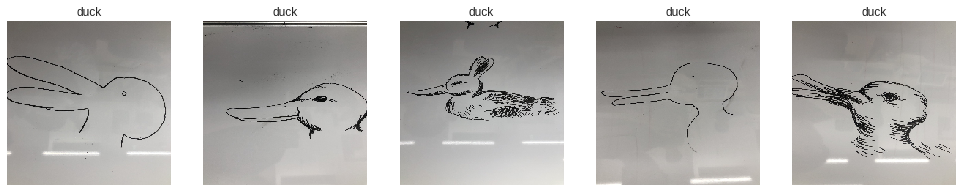

In [158]:
display_dir = 'gdrive/My Drive/diveintocode-ml/splint19/test/duck_or_rabi'
#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,5)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(5):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(1,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()